导入必要包

In [19]:
from PIL import Image
import torch
from diffusers import StableDiffusionImg2ImgPipeline

加载模型

In [20]:
model_id_or_path = "sd-legacy/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16, safety_checker=None)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [21]:
pipe.unet

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_fe

下载图片

In [4]:
import requests

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg/800px-Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg"
file = requests.get(url, allow_redirects=True)
open('Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg', 'wb').write(file.content)

144625

打开图片

In [10]:
init_image = Image.open('Klee.jpg').convert("RGB")
init_image = init_image.resize((512, 512))

In [5]:
init_image = Image.open('Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg').convert("RGB")
init_image = init_image.resize((768, 512))

定义 Prompt

In [11]:
prompt = "A cute loli saying hello to the camera. "

In [6]:
prompt = "A fantasy landscape, trending on artstation"

开始 pipe

In [16]:
images = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images

  0%|          | 0/37 [00:00<?, ?it/s]

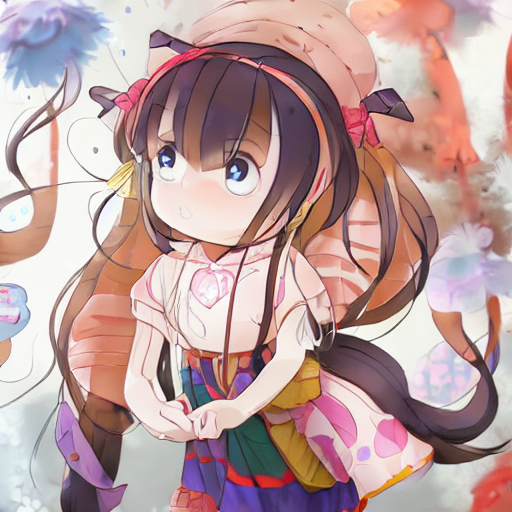

In [17]:
images[0]

保存图片

In [9]:
images[0].save("fantasy_landscape.png")

In [27]:
images[0].save("cute_girl.png")